# 1 Abstract

The objective of this project was to gain experience in performing data wrangling, data visualization and introductory data analysis using Python with suitable libraries. The project also involved beginning to develop skills in formulating a problem from data in a given domain, asking questions of the data, extracting insights from a real-world dataset.

This would provide practise and experience with learning outcomes 1, 2 and 4 from the course outline.

The data provided was RURAL_LS_SAMPLE.csv which has 65,000 anonymised records of individuals' responses to various surveys in rural NZ. However no list was given to give context to the variables.

Python and Jupyter Notebook were used to complete the analysis.

The following 10 key questions were explored in this analysis.

    What are rural people interested in?
    How does marital status affect peoples interests?
    What do rurally located people think of various surveyed topics?
    Does being self employed make you more likely to buy New Zealand made products?
    What are the employment rates of people who live rurally? Are they self employed?
    What is the average income of people living rurally?
    Is there a relationship between income and marital status?
    Does having more income affect what you spend money on?
    What does the distribution of home ownership look like?
    Are income and home value related?


# 2 Introduction

The purpose of this project is to conduct an exploratory analysis of annoymised records of 65,000 individuals' responses to various surveys in rural NZ.

The key questions are made as the data is explored i.e. there were no predetermined questions of interest.

In exploring the data from the rural surveys, some changes are made to the data. This is done in order to replace missing values, create value from categories (using averages) and tidy up the values and columns.

# 3 Methods and Results
## 3.1 Importing libraries into Python

The following libraries were imported into python to better explore the data.

• Pandas is an open source Python data analysis library.

• Numpy (Numeric Python) is an extension module and the fundamental package for scientific computing within Python.

• Matplotlib is the foundational plotting library for the Python programming language.

• Seaborn is a Python visualization library based on matplotlib

• Scipy stats contains a large number of probability distributions as well as a growing library of statistical functions.


In [8]:
# importing requried libs including pandas, numpy, Ipython and matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
 

In [9]:
# Setting some Pandas options:
#pd.set_option('HTML', True) #TBD
pd.set_option('max_columns', 40)
pd.set_option('max_rows', 20)
pd.set_option('display.width', 100)

## 3.2 Data Description

The Dataset RURAL_LS_SAMPLE was provded to us by an industry partnet, who has requested to remain confidential. It has 65,000 anonymised records of individuals' responses to various surveys in rural New Zealand. There are 186 different variables within the dataframe, all corresponding to different responses received.

Although no context or descriptions were given in terms of variable names, they have been made as self-descriptive as possible. In cases where they are not, free reign was given on trying to decipher what the label talked about. However, any assumptions made when using these variables was needed.

Some hints were given in terms of trying to figure out what the different variables meant.

    features with '_M' in them indicate that the response refers to the person who was filling out the survey, while '_P' in the feature name refers to their partner.
    some features have '_A' in them, indicating agree, '_SD' strongly agree, '_D' disagree, '_NO' no opinion or '_SA' strongly agree.
    INT_ indicated an individuals' interests in lifestyle
    OCC_ indicates an individuals' occupation
    
 ## 3.3 Reading the data into Python



In [10]:
df = pd.read_csv('RURAL_NZ.csv', low_memory=False) # reading in data


## 3.4 Data Validation

- After reading in the file RURAL_LS_SAMPLE.csv into Python, we should perform a couple of quick checks to ensure that the data has been read in properly. We would also assume that there needs to be some work done to make sure we're actually able to do things with the data.
- Using df.head(), df.info() and df.describe() enables a quick inspection of the data to confirm that it's been read in properly and that we have indeed created a pandas frame like expected.
- Using df.value_counts() enables a quick inspection of some of the key variables e.g. 'supermarket spend in a week' and 'HMVALUE'
- The use of df.isnull().values.any() lets us know if there are any missing values within the dataframe.
- If we our previous function returns true, we can use df.isnull().sum() to inspect which columns contain the missing values. 

In [11]:
print(df.head(5))

   ID  INT_M_PUB  INT_M_CINEMA  INT_M_THEATRE  INT_M_GYM  INT_M_ENTERTAIN  INT_M_EATOUT  \
0   1        NaN           1.0            1.0        NaN              NaN           NaN   
1   2        NaN           1.0            NaN        NaN              NaN           1.0   
2   3        NaN           1.0            1.0        NaN              1.0           1.0   
3   4        NaN           NaN            NaN        NaN              1.0           NaN   
4   5        NaN           NaN            NaN        NaN              NaN           NaN   

   INT_M_WINE  INT_M_CGAME  INT_M_MUSIC  INT_M_COOK  INT_M_READ  INT_M_GARDEN  INT_M_COMPET  \
0         NaN          NaN          1.0         NaN         1.0           NaN           NaN   
1         NaN          NaN          NaN         1.0         1.0           NaN           NaN   
2         NaN          NaN          NaN         1.0         1.0           1.0           NaN   
3         NaN          NaN          NaN         NaN         NaN          

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Columns: 187 entries, ID to OTHER_FARMER
dtypes: float64(113), int64(1), object(73)
memory usage: 92.7+ MB


,ID,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,INT_M_COOK,INT_M_READ,INT_M_GARDEN,INT_M_COMPET,INT_M_SEW,INT_M_CAR,INT_M_CLOTHESSHOP,OCCUPATION_MYSELF_MANAGER,OCC_P_MGR,OCC_M_PROF,...,ATT_LOWFAT_A,ATT_LOWFAT_NO,ATT_LOWFAT_D,ATT_LOWFAT_SD,ATT_HEALTHY_SA,ATT_HEALTHY_A,ATT_HEALTHY_NO,ATT_HEALTHY_D,ATT_HEALTHY_SD,ATT_FASHION_SA,ATT_FASHION_A,ATT_FASHION_NO,ATT_FASHION_D,ATT_FASHION_SD,ATT_VOTE ON LOCAL ISSUES_SA,ATT_VOTEELEC_A,ATT_VOTEELEC_NO,ATT_VOTEELEC_D,ATT_VOTEELEC_SD,CONTRACT_END_DATE
count,65000.000000,21272.0,36834.0,28107.0,13654.0,36743.0,42903.0,26230.0,13511.0,45321.0,37035.0,41084.0,31328.0,19041.0,16974.0,14057.0,27615.0,5651.0,4366.0,11942.0,...,25863.0,14888.0,7968.0,1533.0,10779.0,28158.0,14537.0,6311.0,543.0,3103.0,15319.0,18692.0,16471.0,5351.0,19815.0,27460.0,10578.0,2462.0,968.0,0.0
mean,32500.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
std,18764.028086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
25%,16250.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
50%,32500.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
75%,48750.250000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
max,65000.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [13]:
df['supermarket spend in a week'].value_counts()

b. $100 to $200    32308
a. Up to $100      13652
c. $200 to $300    13013
d. $300 to $400     3458
g. No Answer        1654
e. $400 to $500      661
f. $500 Plus         254
Name: supermarket spend in a week, dtype: int64

In [14]:
df['HMVALUE'].value_counts()

b. $200k to $400k    22873
c. $400k to $600k    13923
f. Don't know         9818
d. $600k to $800k     5635
a. Under $200k        5032
g. No Answer          3056
d. $800k to $1m       2559
e. Over $1m           2104
Name: HMVALUE, dtype: int64

In [15]:
df.isnull().values.any()

True

In [16]:
df.isnull().sum()

ID                            0
INT_M_PUB                 43728
INT_M_CINEMA              28166
INT_M_THEATRE             36893
INT_M_GYM                 51346
INT_M_ENTERTAIN           28257
INT_M_EATOUT              22097
INT_M_WINE                38770
INT_M_CGAME               51489
INT_M_MUSIC               19679
                          ...  
DAIRY                         0
HORTICULTURE                  0
OTHER_LIVESTOCK               0
RETIRED                       0
SHEEP                         0
SMALL_LIFESTYLE_FARMER        0
TOURISM                       0
OTHER_BUSINESS                0
OTHER_RESIDENTIAL             0
OTHER_FARMER                  0
Length: 187, dtype: int64

- Python appears to have successfully read the complete RURAL_LS_SAMPLE.csv data file. The data seems to be correct with no odd looking values etc. 65000 entries (spanning 187 columns) matches the no. of observations contained in the CSV data file.
- We have however, found some issues that will require cleaning. For example, the number of missing values in the data and the proceeding letters on the responses in some columns for example, the 'supermarket shop in a week' and 'HMVALUE' columns.
- The details and processes used to clean the data are explained in the Data Wrangling section




## 3.5 Data Wrangling

Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

    The dataset Rural_LS_Sample will need to be cleaned using data wrangling steps before any other analysis is done to it

The variables concerned are identified, a statement of the issues is made together with the remdial action taken to resolve the issues / cleanse the data. Any assumptions made are also documented.

Variables INT_M_PUB -- ATT_VOTEELEC_SD;
Issue: There are a lot of NaN values
Remedy: We will replace the NaN values with 0's. This is a sensible choice as the respondents are only allowed to choose one option per column. We also know that changing all of the NaN's in the whole dataframe will not affect any other column as the only NaN's present were in the specified columns (see: df.isnull().sum() code above)


In [17]:
df = df.fillna(value = 0)

__Variables__ HMINV, CAR count, HMOWN, supermarket spend in a week, FLY_DOMESTIC, FLY_INTERNATIONAL, house INCOME, MARITAL and HMVALUE<br>
__Issue__ The data values in each of these columns contain unneccessary proceeding letters that are not informative so should be removed <br>
__Remedy__ This is done by creating a dictionary corresponding to the colums we would like change, splitting the data strings and then re-assign these new names to the dataframe.<br>
** Although there are other columns with this same problem, I've only cleaned the columns that are of interest to this project


In [18]:
HMINV_map = {} # create a dictionary to hold the unique values in HMINV
for val in df['HMINV'].unique(): #iterate through the uniques and place them in the dictionary
    HMINV_map[val] = val.split(' ', 1)[1] # we need to remove the multichoice selection 
car_map = {}
for val in df['CAR count'].unique():
    car_map[val] = val.split(' ', 1)[1]
HMOWN_map = {}
for val in df['HMOWN'].unique():
    HMOWN_map[val] = val.split(' ', 1)[1]
supermarket_map = {}
for val in df['supermarket spend in a week'].unique():
    supermarket_map[val] = val.split(' ', 1)[1]
FLY_DOM_map = {}
for val in df['FLY_DOMESTIC'].unique():
    FLY_DOM_map[val] = val.split(' ', 1)[1]
FLY_INT_map = {}
for val in df['FLY_INTERNATIONAL'].unique():
    FLY_INT_map[val] = val.split(' ', 1)[1]
INCOME_map = {}
for val in df['house INCOME'].unique():
    INCOME_map[val] = val.split(' ', 1)[1]
MARITAL_map = {}
for val in df['MARITAL'].unique():
    MARITAL_map[val] = val.split(' ', 1)[1]
HMVALUE_map = {}
for val in df['HMVALUE'].unique():
    HMVALUE_map[val] = val.split(' ', 1)[1]

# use the dictionaries created to replace the values with ones which make for better reading
df = df.replace({'HMINV':HMINV_map,'CAR count': car_map, 'HMOWN': \
                 HMOWN_map, 'supermarket spend in a week': supermarket_map,\
                 'FLY_DOMESTIC': FLY_DOM_map, 'FLY_INTERNATIONAL': FLY_INT_map, \
                 'MARITAL' : MARITAL_map, 'house INCOME': INCOME_map, 'HMVALUE' : HMVALUE_map})


In [19]:
df['HMINV'].head(5)

0    No Investment Property
1    No Investment Property
2    No Investment Property
3    No Investment Property
4    No Investment Property
Name: HMINV, dtype: object

__Variables__ CUST_BUSINESS -- OTHER_FARMER<br>
__Issue__ The data points here are N or Y. This isn't easily read by the computer<br>
__Remedy__ Changing the N and Y's to 0 and 1's will turn the points into birany data which the computer can understand.

In [20]:
df = df.replace(['N','Y'],[0,1])

In [21]:
df['CUST_BUSINESS'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: CUST_BUSINESS, dtype: int64

__Variables__ CONTRACT_END_DATE<br>
__Issue__ There is no data in this column.<br>
__Remedy__ Delete the column.<br>

In [22]:
df = df.drop('CONTRACT_END_DATE', 1)

In [23]:
print("Still in list" if "CONTRACT_END_DATE" in list(df) else "Not here")

Not here


__Variables__ Variables beginning with OCC_ <br>
__Issue__ Employment rates are of interest to us in this project. While the individual job titles is usable, counting the number of people employed would also be of interest <br>
__Remedy__ Create a new column called OCC_EMP to measure if a person is employed or not.<br>

In [24]:
df['OCC_EMP'] = df['OCCUPATION_MYSELF_MANAGER'] +df['OCC_P_MGR'] +df['OCC_M_PROF']+df['OCC_P_PROF'] +df['OCC_M_SALES'] +df['OCC_P_SALES'] +df['OCC_M_ADMIN']+\
df['OCC_P_ADMIN'] +df['OCC_M_COMM'] +df['OCC_P_COMM'] +df['OCC_M_TRADE']+df['OCC_P_TRADE'] +df['OCC_M_SEMP'] +df['OCC_P_SEMP'] +df['OCC_M_LABOUR']+\
df['OCC_P_LABOUR'] +df['OCC_M_MACH'] +df['OCC_P_MACH'] +df['OCC_M_HMD'] + df['OCC_P_HMD']

__Variables__ 'OCC_RETIRE','OCC_STUD','OCC_UNEMP','OCC_SEMP' <br>
__Issue__ Again, since employment rates are of interest, having separate variables for respondents that are retired, students, unemployed and self-employed would be valuable. The variables are separated by _M and _P so the number of people in these categories aren't in one column, but spread over two.<br>
__Remedy__ Create new columns and aggregate the old columns accordingly.

In [25]:
df['OCC_SEMP'] = df['OCC_M_SEMP'] + df['OCC_P_SEMP']
df['OCC_RETIRE'] = df['OCC_M_RETIRE'] + df['OCC_P_RETIRE']
df['OCC_STUD'] = df['OCC_M_STUD'] + df['OCC_P_STUD']
df['OCC_UNEMP'] = df['OCC_M_UNEMP'] + df['OCC_P_UNEMP']

__Variables__ Income<br>
__Issue__ It would be useful if this column was numerical<br>
__Remedy__ Create a new column with floats instead of categories. For the purpose of this project, the median of each categoy was taken and the data points with 'No Answer' were given an NaN<br>

In [26]:
df['income'] = df['house INCOME'].replace('Under $20k', 10000).replace('$20 to $30k', 25000).replace('$30 to $50k', 40000).\
replace('$50 to $70k', 60000).replace('$70 to $100k', 85000).replace('$100 to $150k', 125000).replace('Over $150k', 150000).replace('No Answer', np.nan)

__Variables__ Home Value<br>
__Issue__ It would be useful if this column was numerical<br>
__Remedy__ Create a new column with floats instead of categories. For the purpose of this project, the median of each categoy was taken and the data points with 'No Answer' were given an NaN<br>

In [27]:
df['homevalue'] = df['HMVALUE'].replace('Under $200k', 100000).replace('$200k to $400k', 300000).replace('$400k to $600k', 500000).\
replace('$600k to $800k', 700000).replace('$800k to $1m', 900000).replace('Over $1m', 1100000).replace('Over $150k', 150000).replace('No Answer', np.nan).replace("Don't know", np.nan)

# 3.6 EDA, Data Analysis and Visualisation
After cleaning the data, exploratory data analysis is performed to get a better understanding of the Rural Sample Data. Insights will be extracted from the data through the asking of questions and visualy displaying the data according to the questions.

There are 10 questions of interest here

    What are rural people interested in?
    How does marital status affect peoples interests?
    What do rurally located people think of various surveyed topics?
    Does being self employed make you more likely to buy New Zealand made products?
    What are the employment rates of people who live rurally? Are they self employed?
    What is the average income of people living rurally?
    Is there a relationship between income and marital status?
    Does having more income affect what you spend money on?
    What does the distribution of home ownership look like?
    Are income and home value related?



__Question 1: What are rural people interested in?__ <br>
This information provides a clearer picture of what people are interested in and can be used while launching a new business or product to make sure that they can attract customers.

In [28]:
interestCols = [i for i in range(1,17)] # list of columns of interest
tempdf = df.iloc[:,interestCols] # subsetting
tempdf.head(5) # check

,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,INT_M_COOK,INT_M_READ,INT_M_GARDEN,INT_M_COMPET,INT_M_SEW,INT_M_CAR,INT_M_CLOTHESSHOP
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [29]:
# calculate total and percentage of people interested.
total_persons = len(tempdf.index)
interestFactor = tempdf.apply(np.sum) # generate total row for peoples interests
interestFactor = interestFactor.divide(total_persons) # calculate percentages 
interestFactor = interestFactor.mul(100) 
interestFactor.index = [w.replace('INT_M_', '') for w in interestFactor.index] # tidy index columns

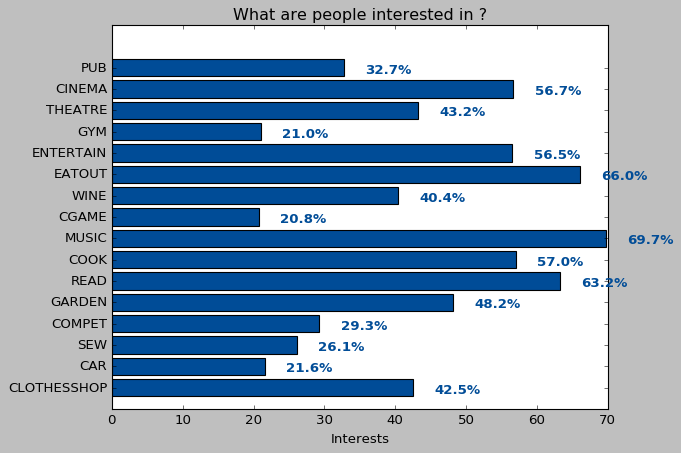

In [30]:
# draw bar Chart
plt.rcdefaults()
fig, ax = plt.subplots() # create plot object
y_pos = np.arange(len(interestFactor.index))
ax.barh(y_pos, interestFactor.values,align='center',
        color='#004C97', ecolor='black') # bar chart
ax.set_yticks(y_pos)
ax.set_yticklabels(interestFactor.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Interests')
ax.set_title('What are people interested in ?')
for i, v in enumerate(interestFactor.values):
    ax.text(v + 3, i + .25, ("%.1f" % v)+"%", color='#004C97', fontweight='bold') # use v and i for positioning of text

plt.show()

There are a variety of different activities that are asked about in the survey. It appears that music, reading and eating out are the most popular activities for rural people. Going to the gym, computer gaming and cars have the least interests. Only 48.2% of rural people listed gardening as an interest which is suprising given that there is an assumption that rural people live on larger blocks of land.

These interests are a mixture of solo activities and ones with other people. We should explore whether other factors affect interests as "rural people" is quite a broad subset.


__Question 2: How does marital status affect peoples interests?__

In [31]:
df1 = df.iloc[:,interestCols].join(df['MARITAL']) # joining MARITAL column with the interests columns

In [32]:
interests = list(df1)[:-1] # MARITAL column not needed
columns = ["Interest", "Married", "Single/Divorced"]
interestsdf = pd.DataFrame(columns=columns) # create empty dataframe

# summing counts of married and single -- 'single' is single and divorced
single_count = (df1["MARITAL"] == "Divorced/Seperated").sum() + (df1["MARITAL"] == "Single").sum() 
married_count = (df1["MARITAL"] == "Married").sum()

# use enumerate to loop through interests and keep a row count
# and add proportions of people interested by MARITAL
for c, i in enumerate(interests):
    interestsdf.loc[c] = [i, (100*(tempdf.loc[df["MARITAL"] == "Married", i].sum() / married_count)), \
                          (100*((tempdf.loc[df["MARITAL"] == "Single", i].sum() + tempdf.loc[df["MARITAL"] == "Divorced/Seperated", i].sum())/single_count))]

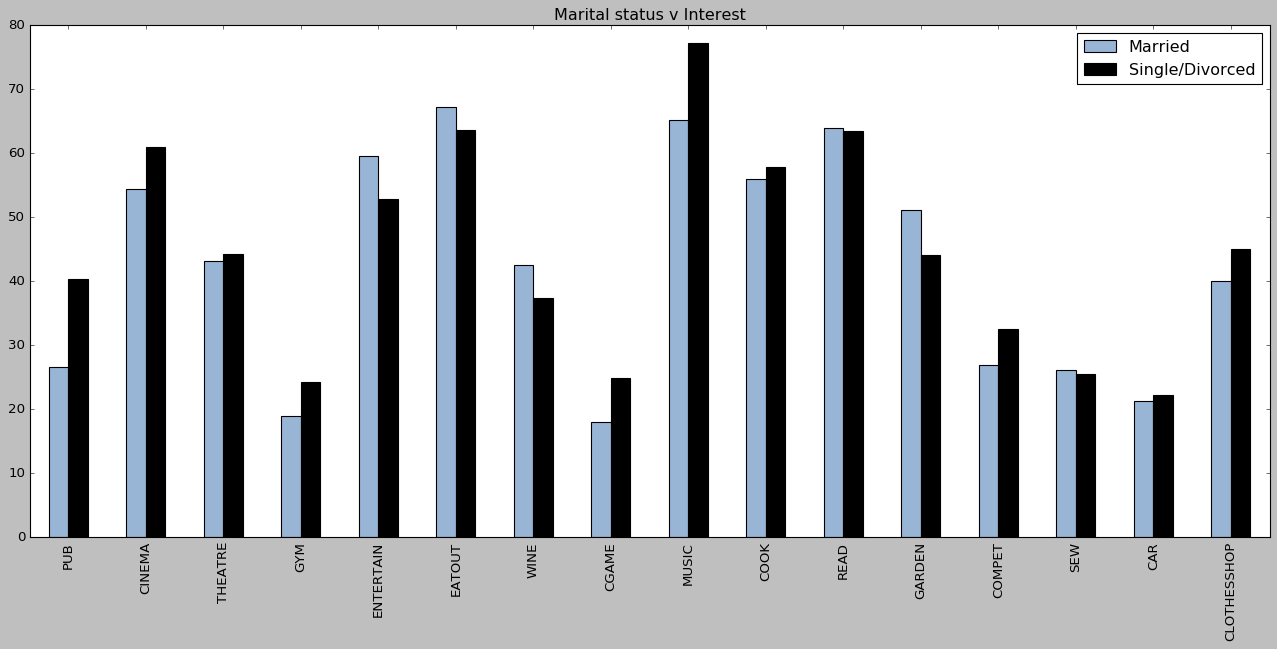

In [33]:
# plotting
interestsdf.plot(kind='bar', title='Marital status v Interest', figsize=(20,8),color=['#99B5D5', 'black']).set_xticklabels(list(interestFactor.index))
plt.show()

We can see from the bar graph that the distribution of interests is similar between the married and single/divorced groups. However, there are some differences:

- Around 40% of single people listed going to the pub as an interest compared with around 25% of married people. The pub might be a good way for rural dwellers to meet new people because they live in a small community.
- Around 25% of single people listed computer gaming (CGAME) as an interest compared to around 16% of married people. They also had a higher proportion of interest in music and gym. This could be because single people have more free time and less responsibility.
- A higher proportion of married respondents were interested in entertaining. Perhaps this is related to ages of married people as older people like to host and entertain.
- It seems that married people have slightly fewer interests in general.

__Question 3: What do rurally located people think of various surveyed topics?__
This question looks at what people are thinking about various things. This information can be used to predict if a local product is launched in the market, how much people will be willing to buy it as compare to its international competitor? How much people weigh Environment friendliness or quality of product while purchasing? How much people prefer healthy or low fat food products? If any local issue is raised how much people are concerned and would come out to vote?

In [34]:
attCols = [i for i in range(45,115)] # columns of interest
df3 = df.iloc[:,attCols] # subsetting
numCats = int(len(df3.columns.values)) # finding the number of categories there are

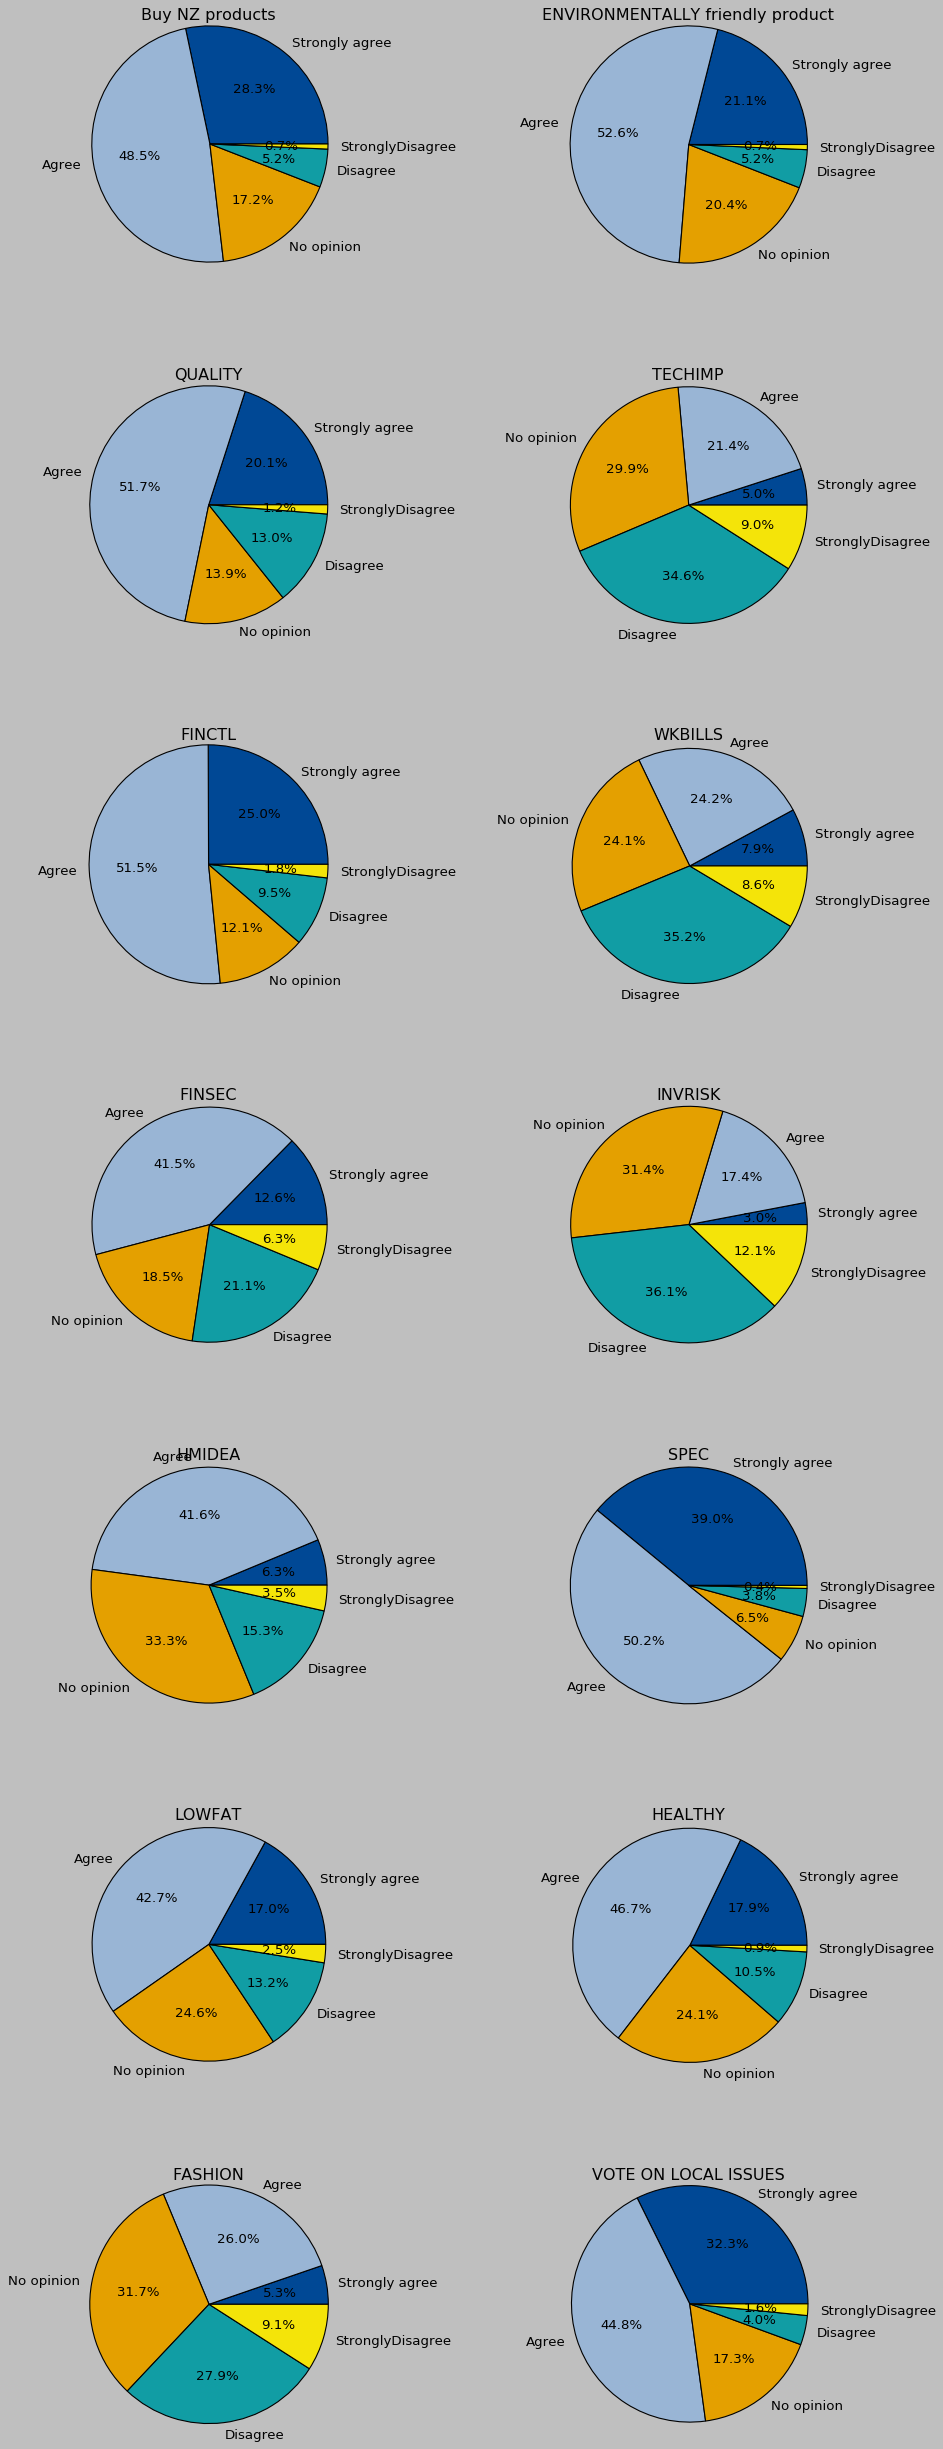

In [35]:
# plotting
fig = plt.figure()
labels = 'Strongly agree', 'Agree', 'No opinion', 'Disagree', 'StronglyDisagree'
colors = ['#004895','#99B5D5','#E4A000','#119DA4','#F4E409']
x = 14 # number of topics
y = 0
for idx in range(0,numCats,5):
    temp_df = df3.iloc[:, idx:idx+5]
    temp_data = temp_df.apply(np.sum)
    ax1 = fig.add_axes([y, x, 0.5, .5], aspect=1)
    ax1.pie(temp_data.values, labels=labels, colors=colors,autopct='%1.1f%%')
    ax1.axis('equal') # makes sure its a circle
    
    # fix titles
    title = temp_data.index[0]
    title = title.replace("ATT_", "")
    title = title.replace("_Strongly agree", "")
    title = title.replace("_SA", "")
    title = title.replace("productas", "products")
    title = title.replace("_", " ")
    plt.title(title);
    
    # positioning of pie charts on figure
    if idx%10 !=0:
        x = x - 0.75
    if y==0:
        y=0.75
    else:
        y = 0

plt.show()



From these plots we can see;

A large number of the respondents indicated that they considered environmental friendliness to be important when considering a purchase. This is possibly suprising as some New Zealanders assume that the rural community are not environmentally conscious.

The respondents had positive attitudes towards buying New Zealand made and purchasing high quality products. As they live rurally, the respondents would find it more difficult to purchase and replace items. As a number of them are business owners (self-employed), they may empaphise and want to support other local businesses.

The respondents responded positively on voting on local issues. This could be in contrast to urban areas where participation in local affairs is low e.g. local election turn outs. It may be more important for rural people to be involved in the local community because it affects their livelihood.

For most of the responses, where there is a high disagreement rate there is also a high no opinion rate. This would be something to explore as people who respond with no opinion may in fact have an opinion.

Taking investment risks (INVRSK) had a high rate of disagreement and no opinion. This suggests a number of rural dwellers are conservative with their investment approach.

It is also interesting that the people surveyed mainly agreed on the healthy and low fat diets.


__Question 4: Does being self employed make you more likely to buy New Zealand made products?__

In [36]:
df4 = df # creating a temporary dataframe
employmentCols = [i for i in range(17,43)] # grab employment columns
temp1 = df.iloc[:,employmentCols]
#print(df.columns)
#old[['A', 'C', 'D']].copy()
temp2 = df.filter(['OCC_EMP','OCC_RETIRE','OCC_STUD','OCC_UNEMP', 'OCC_SEMP'],axis=1)
df5 = temp1.join(temp2) # create a new dataframe with all employment columns

In [37]:
temp1.columns

Index(['OCCUPATION_MYSELF_MANAGER', 'OCC_P_MGR', 'OCC_M_PROF', 'OCC_P_PROF', 'OCC_M_SALES',
       'OCC_P_SALES', 'OCC_M_ADMIN', 'OCC_P_ADMIN', 'OCC_M_COMM', 'OCC_P_COMM', 'OCC_M_TRADE',
       'OCC_P_TRADE', 'OCC_M_SEMP', 'OCC_P_SEMP', 'OCC_M_LABOUR', 'OCC_P_LABOUR', 'OCC_M_MACH',
       'OCC_P_MACH', 'OCC_M_HMD', 'OCC_P_HMD', 'OCC_M_RETIRE', 'OCC_P_RETIRE', 'OCC_M_STUD',
       'OCC_P_STUD', 'OCC_M_UNEMP', 'OCC_P_UNEMP'],
      dtype='object')

In [38]:
# create column names
columns = ["EmployedStatus", "Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "No Opinion"] # new column names
buynzdf = pd.DataFrame(columns=columns) # new data frame

# add two rows -- the sums in each agreement category by employment status
buynzdf.loc[0] = ["Self Employed",df4.loc[df4["OCC_SEMP"] == 1, "ATT_Buy_NZ_productas_Strongly agree"].sum(), df4.loc[df4["OCC_SEMP"] == 1, "ATT_Buy_NZ_productas_agree"].sum(), \
                  df4.loc[df4["OCC_SEMP"] == 1, "ATT_NZPROD_Disagree"].sum(), df4.loc[df5["OCC_SEMP"] == 1, "ATT_NZPROD_StronglyDisagree"].sum(), \
                  df4.loc[df4["OCC_SEMP"] == 1, "ATT_Buy_NZ_productas_no opinion"].sum()]
    
buynzdf.loc[1] = ["Not Self-Employed",df4.loc[df4["OCC_SEMP"] == 0, "ATT_Buy_NZ_productas_Strongly agree"].sum(), df4.loc[df4["OCC_SEMP"] == 0, "ATT_Buy_NZ_productas_agree"].sum(), \
                  df4.loc[df4["OCC_SEMP"] == 0, "ATT_NZPROD_Disagree"].sum(), df4.loc[df5["OCC_SEMP"] == 0, "ATT_NZPROD_StronglyDisagree"].sum(), \
                  df4.loc[df5["OCC_SEMP"] == 0, "ATT_Buy_NZ_productas_no opinion"].sum()]

# calculating sums to make proportions
selfemp = buynzdf.iloc[0,1:].sum()
notselfemp = buynzdf.iloc[1,1:].sum()

# set index to first column - Employed Status
buynzdf.set_index("EmployedStatus",inplace = True)

# create dataframe not including first column
buynzpropdf = pd.DataFrame(columns=columns[1:])

# proportions
buynzpropdf.loc["Self Employed"] = buynzdf.iloc[0,:] / selfemp
buynzpropdf.loc["Not Self-Employed"] = buynzdf.iloc[1,:] / notselfemp

buynzdf

,Strongly Agree,Agree,Disagree,Strongly Disagree,No Opinion
EmployedStatus,,,,,
Self Employed,2490.0,4248.0,410.0,47.0,1399.0
Not Self-Employed,14151.0,24476.0,2743.0,373.0,8902.0


It seems that there is very little difference between the proportions of self-employed and not self-employed in each category. However, there was a slightly higher proportion of agreement to buying New Zealand made products in the self-employed group.

__Question 5: What are the employment rates of people who live rurally? Are they self employed?__

In [39]:
employmentCols = [i for i in range(17,43)] # grab employment columns
temp1 = df.iloc[:,employmentCols]
#print(df.columns)
#old[['A', 'C', 'D']].copy()
temp2 = df.filter(['OCC_EMP','OCC_RETIRE','OCC_STUD','OCC_UNEMP', 'OCC_SEMP'],axis=1)
df5 = temp1.join(temp2) # create a new dataframe with all employment, columns

In [40]:
fig = plt.figure()
ratio_df = df5.filter(['OCC_EMP','OCC_RETIRE','OCC_STUD','OCC_UNEMP'],axis=1)
ratio_data = ratio_df.apply(np.sum) # get sums

In [41]:
labels = ['Employed', 'Retire', 'Student', 'Unemployed']
colors = ['#004895','#E4A000','#99B5D5','#000000']
# plot
ax1 = fig.add_axes([0, 0, 0.75, .5], aspect=1)
ax1.pie(ratio_data.values, labels=list(labels), colors=colors, 
        autopct='%1.1f%%', startangle=40) # pie chart

ax1.pie(ratio_data.values, colors=colors, 
        autopct='%1.1f%%', startangle=40) # pie chart

# add asthetics - create a center circle and overlay
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') # makes sure it is a circle
plt.title('Employment Ratio');

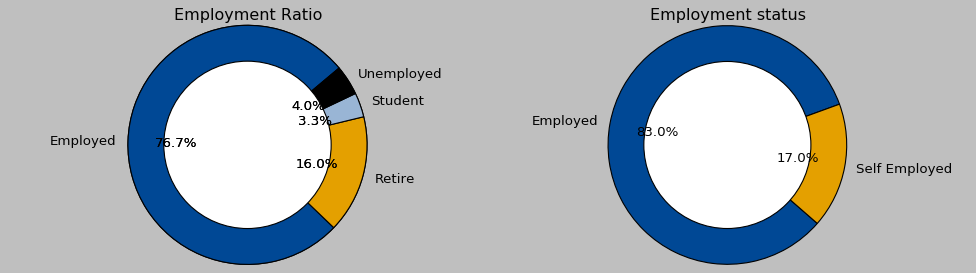

In [42]:
# employed vs self-employed
ratio_df = df[['OCC_EMP','OCC_SEMP']]
ratio_data = ratio_df.apply(np.sum)
ratio_data['OCC_EMP'] = ratio_data['OCC_EMP'] - ratio_data['OCC_SEMP'] # to remove self employed count from Employed count
labels = ['Employed', 'Self Employed']
colors = ['#004895','#E4A000']
ax2 = fig.add_axes([.75, .0, 0.75, .5], aspect=1)
ax2.pie(ratio_data.values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=20)

# asthetics
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax2.axis('equal') # makes sure it is a circle
plt.title('Employment status');
plt.show()

There is a high rate of employment in the respondents. 76.7% responded as being employed. It is surprising that out of those who are employed, only 17% are self-employed.<br>

These graphs represent employment to unemployment ratio, retired vs working ratio etc... This information can be used to access financial status, age groups and other such information. We can see from these pie charts that most of the people are infact employed. Infact, only a small 4% are unemployed. The graph on right side represents self-employed vs employed people and can used to understand the entrepreneurial potential in a society.


__Question 6: What is the average income of people living rurally?__

In [43]:
df6=df # temporary dataframe

In [44]:
income = df6['income'].values # list of values
incomenonnulls = income[~np.isnan(income)] # without the null values

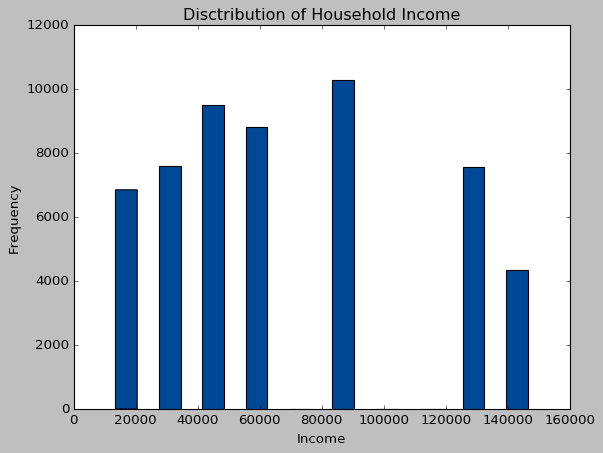

In [45]:
plt.hist(incomenonnulls, color = "#004895", rwidth=0.5)
plt.title("Disctribution of Household Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [46]:
freqtable = pd.crosstab(index=df6["income"], columns = "counts").transpose()
freqtable

income,10000.0,25000.0,40000.0,60000.0,85000.0,125000.0,150000.0
col_0,,,,,,,
counts,6849,7595,9513,8808,10285,7571,4351


In [47]:
# number of no answers
df6['income'].isnull().sum()

10028

In [48]:
np.median(incomenonnulls)

60000.0

In [49]:
stats.describe(incomenonnulls)

DescribeResult(nobs=54972, minmax=(10000.0, 150000.0), mean=66226.71541875864, variance=1851137898.996489, skewness=0.5115802680575385, kurtosis=-0.8721307287810398)

The median is a better indicator than the mean when looking at income data. Medians are normally taken on income data because of potential outliers (there are non in this case) and as income is right-skewed (however this is not so clear from the graph). Median income is more reflective of "what the average person" earns.

The median income was found after taking the average value of each category. The median income for a rural person was found to be $60,000.


__Question 7: Is there a relationship between income and marital status?__

In [50]:
# temporary df with columns MARITAL and income
df7 = pd.DataFrame(columns = ['MARITAL','income'])
df7['income'] = df['income']
df7['MARITAL'] = df['MARITAL']

#drop rows with NaN's -- not useful
df7 = df7.dropna(how='any',axis=0) 
df7.head()

,MARITAL,income
1,Married,125000.0
2,Married,40000.0
3,Widowed,25000.0
4,Married,25000.0
5,De facto,40000.0


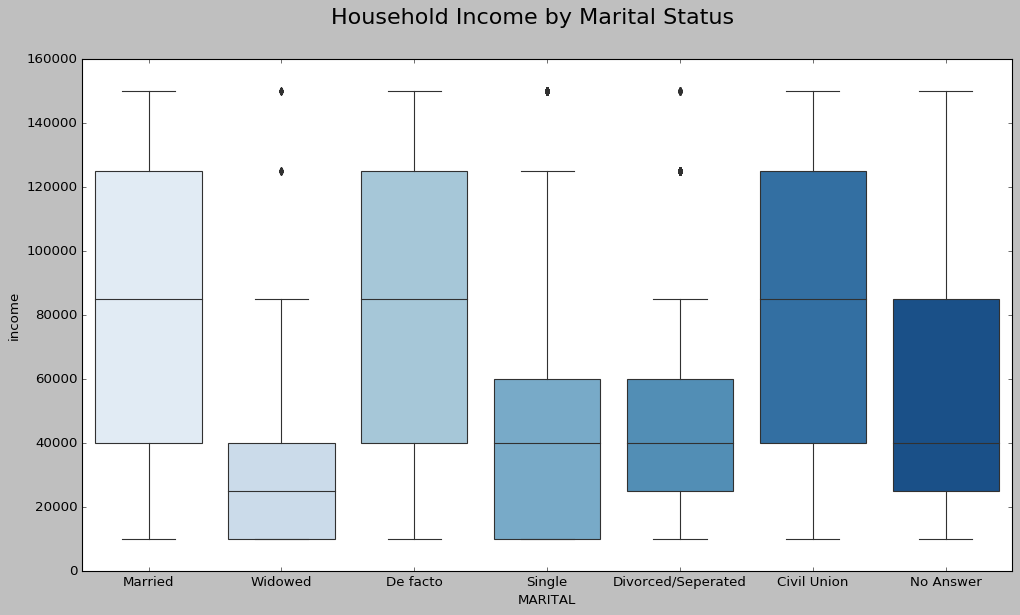

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
fig.suptitle("Household Income by Marital Status", fontsize=20)
sns.boxplot(x=df7["MARITAL"], y=df7["income"], palette="Blues")
plt.show()

### ANOVA

It appears that those who are widowed, single or divorced have lower median household incomes than those in a relationship. For those that are Divorced/ Separated, those in the 75th percentile for household income are earning just $80,000 compared to over $150,000 for those who are married.

From the BoxPlots above, it would be usedful to test if there is evidence for the effect of marital status on household income. To determine this, an ANOVA was performed.


In [52]:
grps = pd.unique(df7.MARITAL.values)
d_data = {grp:df7['income'][df7.MARITAL == grp] for grp in grps}
 
k = len(pd.unique(df7.MARITAL))  # number of conditions
N = len(df7.values)  # conditions times participants
n = df7.groupby('MARITAL').size()[0] #Participants in each condition

F, p = stats.f_oneway(d_data['Married'], d_data['Widowed'], d_data['De facto'],d_data['No Answer'], d_data['Single'], d_data['Divorced/Seperated'], d_data['Civil Union'])

# calculating degrees of freedom
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

In [53]:
# sum of squares
SSbetween = (sum(df7.groupby('MARITAL').sum()['income']**2)/n) - (df7['income'].sum()**2)/N

# sum of squared within
sum_y_squared = sum([value**2 for value in df7['income'].values])
SSwithin = sum_y_squared - sum(df7.groupby('MARITAL').sum()['income']**2)/n

# sum of squares total
SStotal = sum_y_squared - (df7['income'].sum()**2)/N

# mean squared between
MSbetween = SSbetween/DFbetween

# mwan squared within
MSwithin = SSwithin/DFwithin

# F-value
F = MSbetween/MSwithin

# p-value
p = stats.f.sf(F, DFbetween, DFwithin)

# calculating the size of the effect n squared
eta_sqrd = SSbetween/SStotal

# omega squared 
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

In [54]:
descstats ={'SSbetween': SSbetween,'SSwithin': SSwithin,'SStotal': SStotal,'MSbetween': MSbetween,'MSwithin': MSwithin,'F': F,'p': p,'N squared': eta_sqrd,'Omega squared': om_sqrd}
descstats

{'F': -9200.50653446065,
 'MSbetween': 3933106022402528.5,
 'MSwithin': -427487987500.58105,
 'N squared': 231.9073397917861,
 'Omega squared': 232.91100219447355,
 'SSbetween': 2.3598636134415172e+16,
 'SStotal': 101758901445736.0,
 'SSwithin': -2.3496877232969436e+16,
 'p': 1.0}

The anova analys compares the variability within each group to the variability of the data between groups to determine whether there is a significant difference. The null hypothesis is that marital status does not have an effect on household income. With a p value of 1, we cannot reject the null hypothesis. Therefore, being of a different marital status does not effect the income of rural people.

__Question 8: What does the distribution of home ownership look like?__

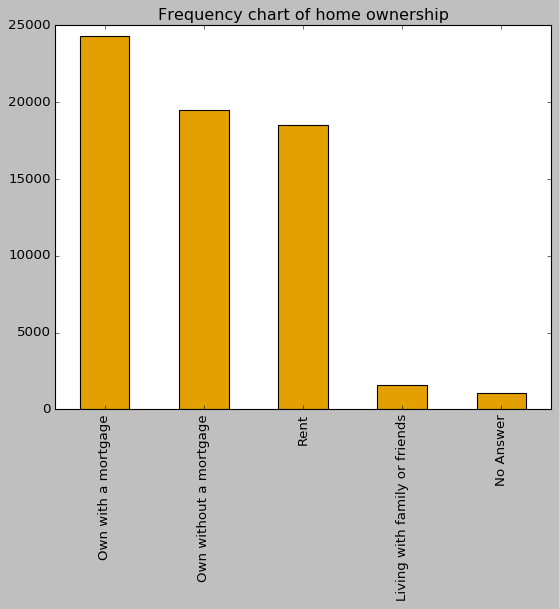

In [55]:
df['HMOWN'].value_counts().plot('bar', color = "#E4A000", title = "Frequency chart of home ownership")
plt.show()

The majority of rural people surveyed own their own home (either with or without a mortgage). Nearly 18,000 people surveyed rent. Very few people live with family and friends suggesting high availability of affordable rural properties.

__Question 9: Are income and home value related?__

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


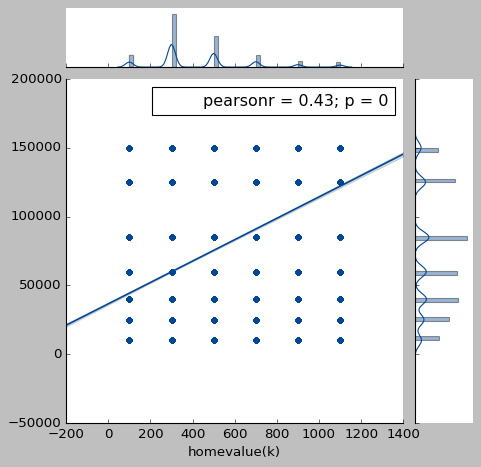

In [69]:
df10 = df # temporary df
#ticks = plt.get*10**9
#plt.set_xticklabels(ticks)
ax=sns.jointplot(df['homevalue']/1000,df['income'], kind="reg", color="#004895")
ax.set_axis_labels(xlabel="homevalue(k)")
plt.show()